# Pokémon Exploratory Data Analysis

This project presents an exploratory data analysis (EDA) of a Pokémon dataset containing base stats, Pokémon types, and generations.

The objective is to understand the dataset structure and explore distributions, relationships between stats, and patterns across Pokémon types and generations. The analysis focuses on descriptive and exploratory techniques rather than rankings, predictions, or formal statistical inference.

Each Pokémon can have one or two types. In all type-based analyses, primary and secondary types are treated symmetrically. A dual-type Pokémon contributes once to each of its types, reflecting the true frequency and statistical profiles of Pokémon types in the dataset.


## Data Source
This dataset was downloaded from https://www.kaggle.com/datasets/rounakbanik/pokemon. According to the dataset author, the original Pokémon information was collected from Serebii.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 5)
sns.set_context("notebook")

GREEN = "green"


We begin by loading the dataset and inspecting its structure to confirm column names, data types, and overall composition.

In [2]:
df = pd.read_csv("pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


As a first step, we examine the overall structure of the dataset, including its dimensions, variable types, and basic descriptive statistics for numeric features.

In [3]:
print("Shape (rows, columns):", df.shape)
df.info()
df.describe().T.head(20)

Shape (rows, columns): (801, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float6

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,0.996255,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,0.968789,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,0.985019,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020,0.788896,0.25,0.5,1.0,1.0,4.0


Basic dataset overview

This section answers foundational questions about the dataset: the total number of Pokémon, the number of generations represented, and the number of distinct Pokémon types when considering both primary and secondary types.


In [4]:
total_pokemon = df.shape[0]
n_generations = df["generation"].nunique()

all_types = pd.concat([df["type1"], df["type2"]], ignore_index=True).dropna()
n_types = all_types.nunique()

print(f"Total Pokémon: {total_pokemon}")
print(f"Generations represented: {n_generations}")
print(f"Distinct types (Type 1 + Type 2): {n_types}")

Total Pokémon: 801
Generations represented: 7
Distinct types (Type 1 + Type 2): 18


The dataset includes 801 Pokémon distributed across seven generations, with a total of 18 distinct Pokémon types when primary and secondary types are combined.

The number of Pokémon introduced per generation varies considerably, indicating that Pokémon releases are not uniform over time. This variation is important to keep in mind when comparing generations, as differences in sample size may influence aggregated statistics.

Type frequency analysis shows a clear imbalance in how often different types appear. Some types are significantly more common, partly due to their frequent use as secondary types.


Examining the number of Pokémon introduced per generation helps contextualize generational comparisons.

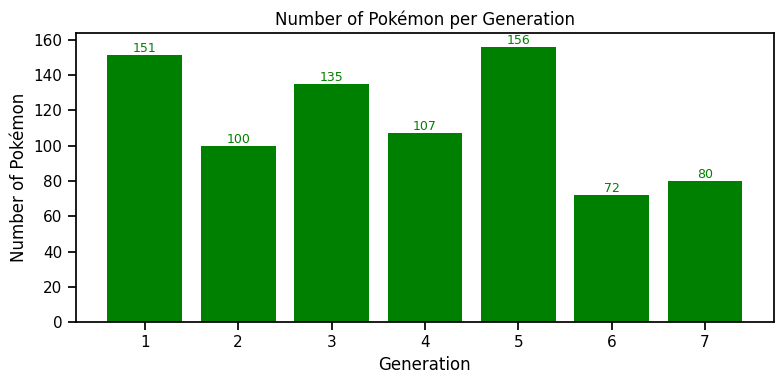

In [5]:
gen_counts = df["generation"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
bars = plt.bar(gen_counts.index.astype(str), gen_counts.values, color=GREEN)
plt.xlabel("Generation")
plt.ylabel("Number of Pokémon")
plt.title("Number of Pokémon per Generation")

# Add value labels on top of bars
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width() / 2, h, f"{int(h)}", ha="center", va="bottom", color=GREEN, fontsize=9)

plt.tight_layout()
plt.show()

To understand how Pokémon types are represented, we count the frequency of each type by combining primary and secondary types. Dual-type Pokémon contribute once to each of their types.

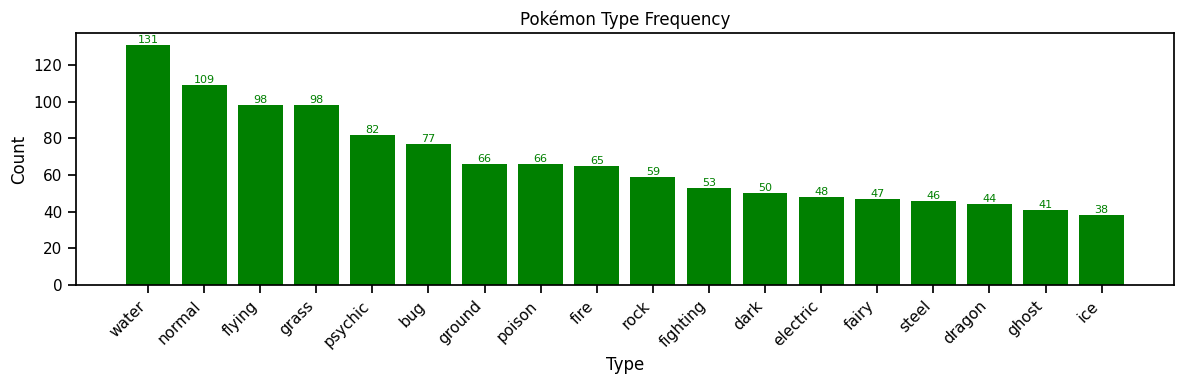

In [6]:
type_counts = all_types.value_counts()

plt.figure(figsize=(12, 4))
bars = plt.bar(type_counts.index.astype(str), type_counts.values, color=GREEN)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Pokémon Type Frequency")
plt.xticks(rotation=45, ha="right")

# Add value labels on top of bars
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width() / 2, h, f"{int(h)}", ha="center", va="bottom", color=GREEN, fontsize=8)

plt.tight_layout()
plt.show()

## Distributions of base stats

Base stats define a Pokémon’s fundamental combat characteristics. To visualize distributions, we use scatter-based distribution plots. This makes it easy to see the spread, density, and extreme values for each stat.


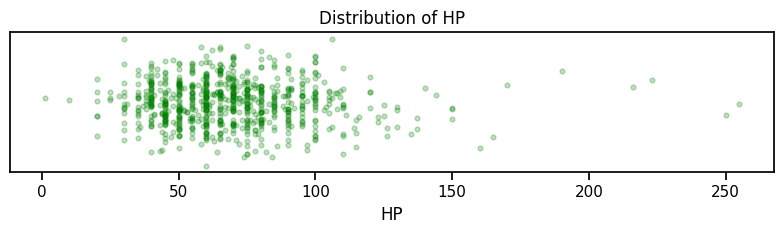

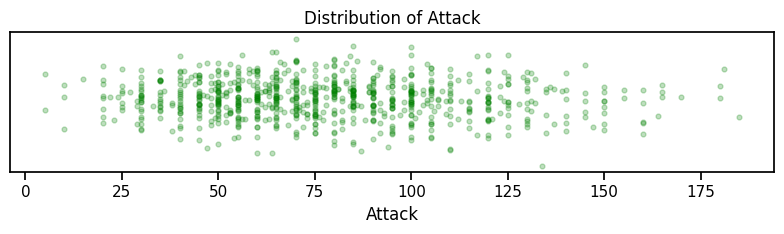

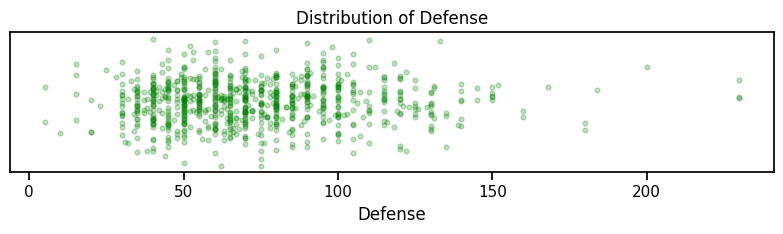

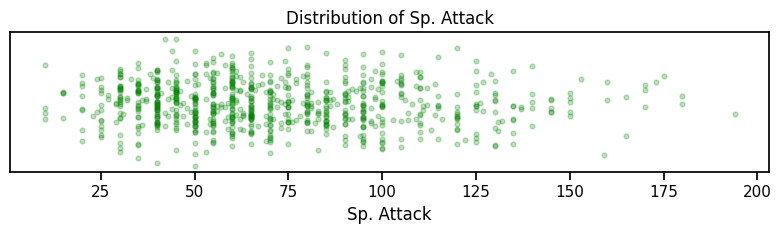

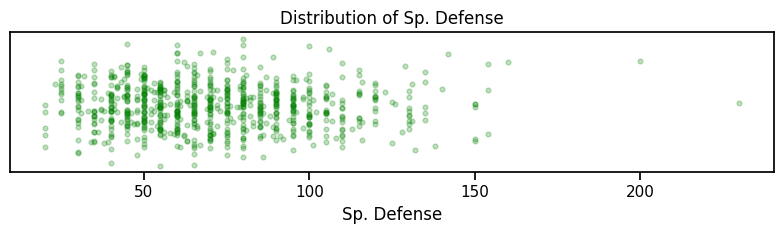

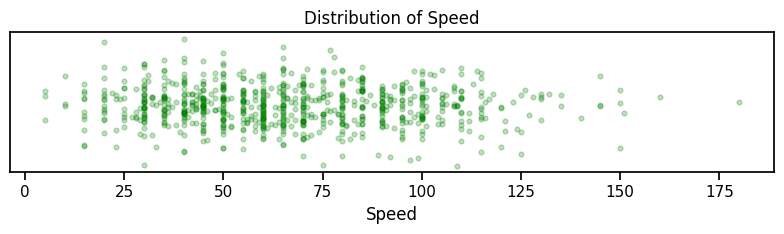

In [7]:
stats_cols = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]
pretty_names = {
    "hp": "HP",
    "attack": "Attack",
    "defense": "Defense",
    "sp_attack": "Sp. Attack",
    "sp_defense": "Sp. Defense",
    "speed": "Speed",
}

rng = np.random.default_rng(42)

for col in stats_cols:
    x = df[col].dropna().to_numpy()
    y = rng.normal(loc=0.0, scale=0.04, size=len(x))  # small jitter to reveal density

    plt.figure(figsize=(8, 2.5))
    plt.scatter(x, y, alpha=0.25, color=GREEN, s=12)
    plt.yticks([])
    plt.xlabel(pretty_names[col])
    plt.title(f"Distribution of {pretty_names[col]}")
    plt.tight_layout()
    plt.show()

Most base stat distributions are right skewed, with many Pokémon clustered around moderate values and fewer Pokémon exhibiting very high stats, indicating intentional stat balancing.

Offensive stats show greater variability than defensive stats, indicating a wide range of offensive archetypes. The scatter distributions also make it easy to spot extreme values without relying on summary only plots.


## Relationships between stats

We explore relationships between stats using scatter plots, focusing on offensive stats, defensive stats, and survivability related attributes.


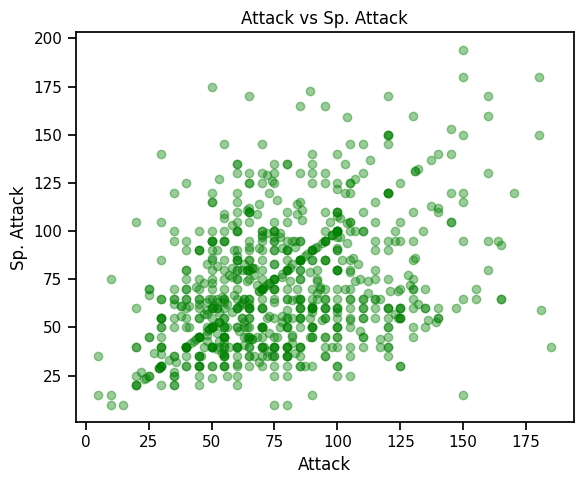

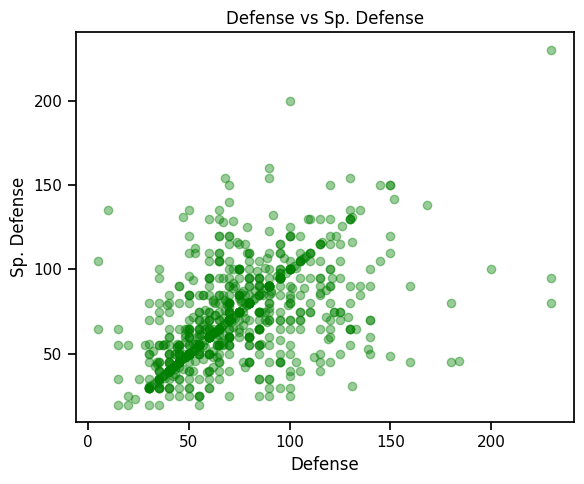

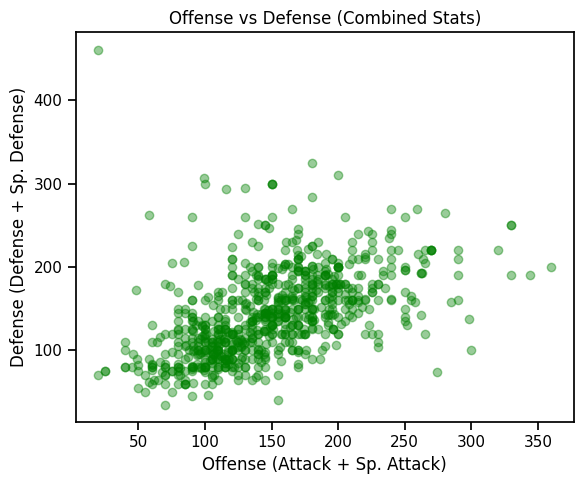

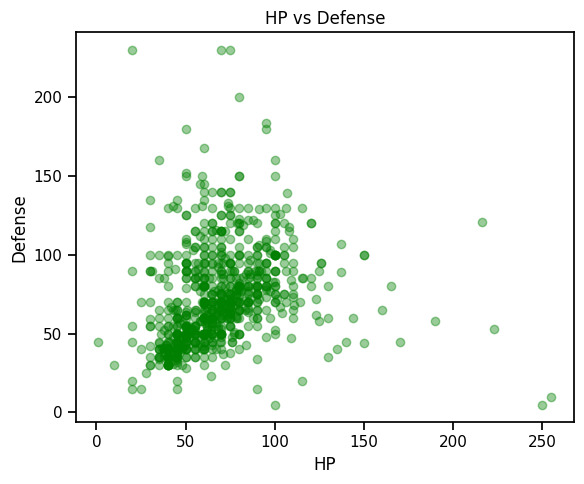

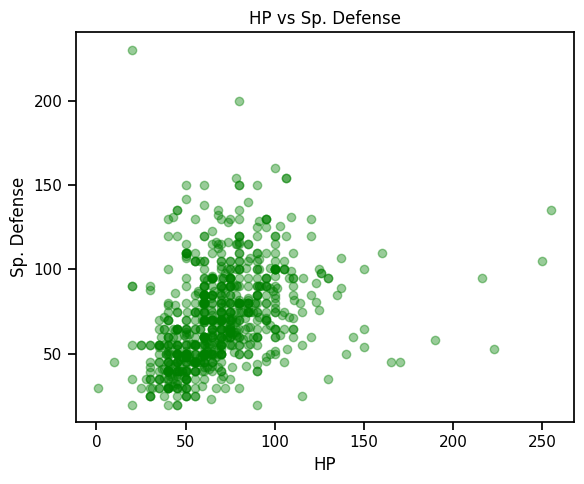

In [8]:
plt.figure(figsize=(6, 5))
plt.scatter(df["attack"], df["sp_attack"], alpha=0.4, color=GREEN)
plt.xlabel("Attack")
plt.ylabel("Sp. Attack")
plt.title("Attack vs Sp. Attack")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(df["defense"], df["sp_defense"], alpha=0.4, color=GREEN)
plt.xlabel("Defense")
plt.ylabel("Sp. Defense")
plt.title("Defense vs Sp. Defense")
plt.tight_layout()
plt.show()

offense = df["attack"] + df["sp_attack"]
defense = df["defense"] + df["sp_defense"]
plt.figure(figsize=(6, 5))
plt.scatter(offense, defense, alpha=0.4, color=GREEN)
plt.xlabel("Offense (Attack + Sp. Attack)")
plt.ylabel("Defense (Defense + Sp. Defense)")
plt.title("Offense vs Defense (Combined Stats)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(df["hp"], df["defense"], alpha=0.4, color=GREEN)
plt.xlabel("HP")
plt.ylabel("Defense")
plt.title("HP vs Defense")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(df["hp"], df["sp_defense"], alpha=0.4, color=GREEN)
plt.xlabel("HP")
plt.ylabel("Sp. Defense")
plt.title("HP vs Sp. Defense")
plt.tight_layout()
plt.show()

The relationships between stats are generally moderate rather than strong, indicating intentional specialization. Many Pokémon invest heavily in one offensive or defensive dimension instead of being uniformly balanced.


## Base stats by Pokémon type

To compare stat distributions across Pokémon types, the dataset is reshaped so that each Pokémon contributes once per type.

In the visualizations below, we use a scatter-based approach with low opacity to reveal point density, and we overlay the median to provide a clear reference for the typical value within each type.


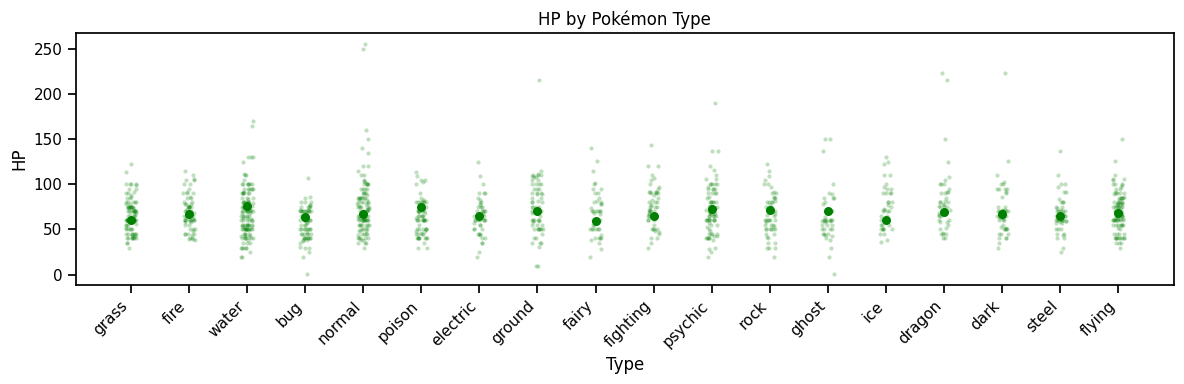

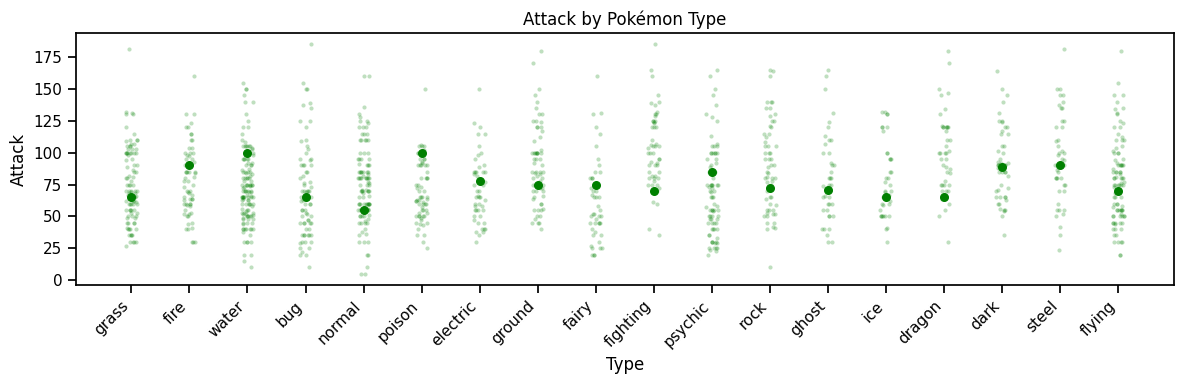

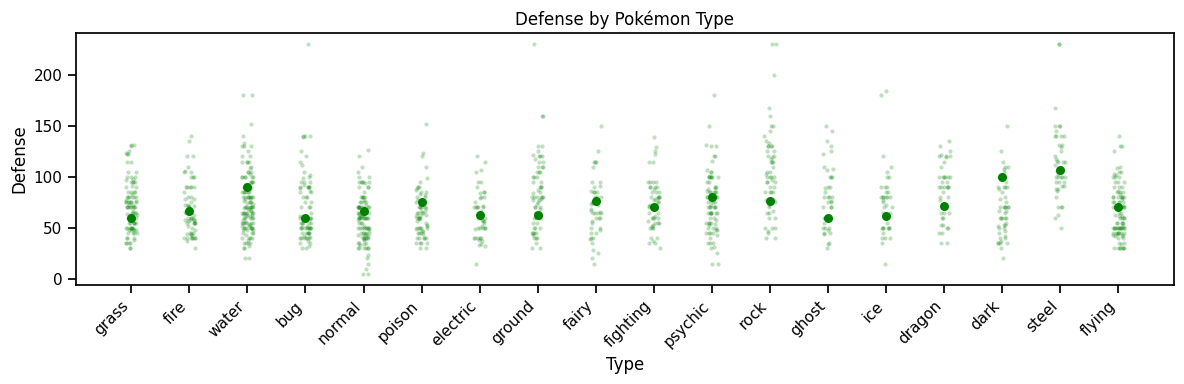

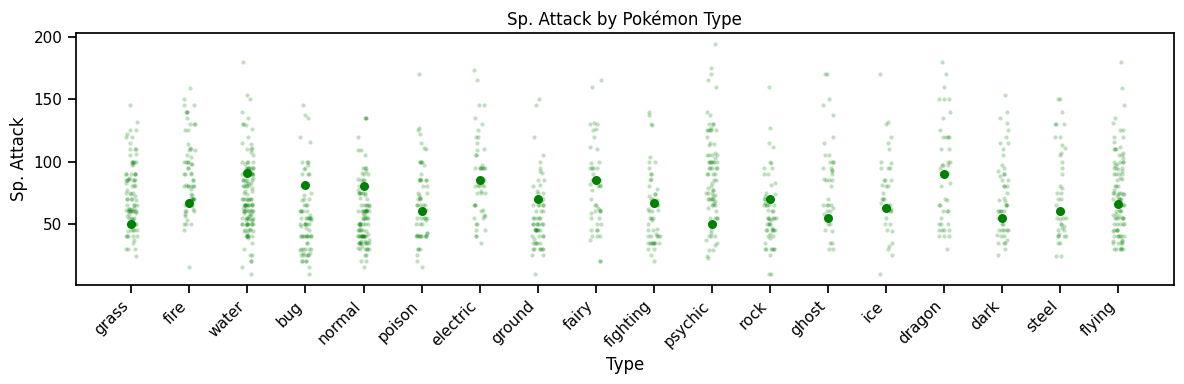

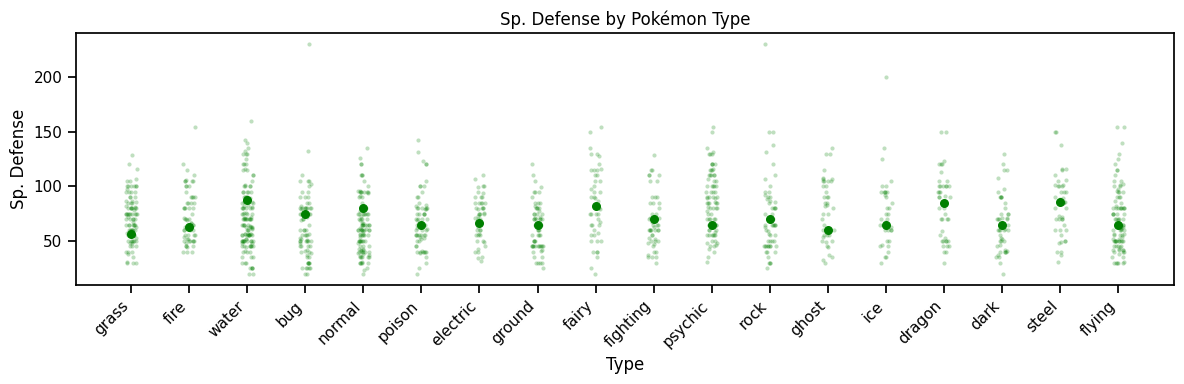

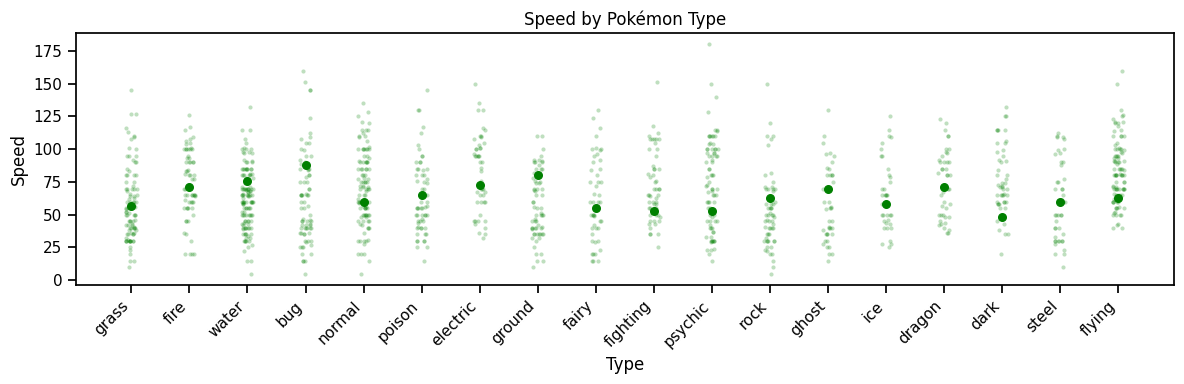

In [9]:
# Long-by-type table (Type 1 and Type 2 treated symmetrically)
df_types_long = pd.concat(
    [
        df[["name", "type1"] + stats_cols].rename(columns={"type1": "type"}),
        df[["name", "type2"] + stats_cols].rename(columns={"type2": "type"}),
    ],
    ignore_index=True
).dropna(subset=["type"])

for col in stats_cols:
    plt.figure(figsize=(12, 4))
    sns.stripplot(
        data=df_types_long,
        x="type",
        y=col,
        color=GREEN,
        alpha=0.25,
        jitter=True,
        size=3
    )

    # Overlay medians as a dot per type (no underscore marker)
    medians = df_types_long.groupby("type")[col].median()
    for i, m in enumerate(medians.values):
        plt.scatter(i, m, color=GREEN, s=30, zorder=5)

    plt.title(f"{pretty_names[col]} by Pokémon Type")
    plt.xlabel("Type")
    plt.ylabel(pretty_names[col])
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Different Pokémon types exhibit distinct stat distribution patterns. Some types show wide variability, while others display more compact profiles.

No single type dominates across all stats, reinforcing that type influences tendencies rather than determining overall strength.

While some types show higher median values for specific stats, the wide dispersion within each type indicates substantial internal variability.

## Evolution across generations

Finally, we explore how base stats and overall base totals evolve across generations.


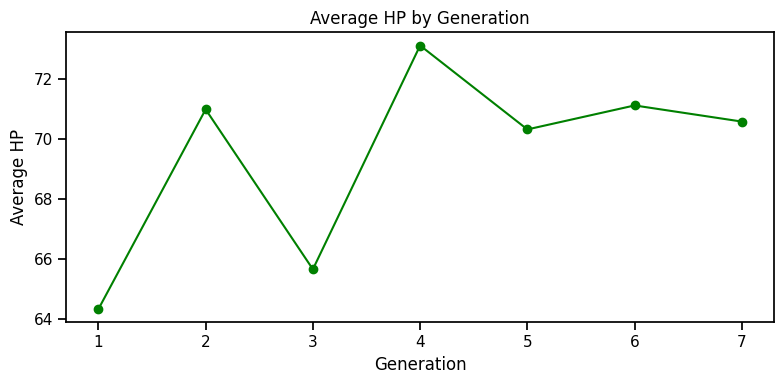

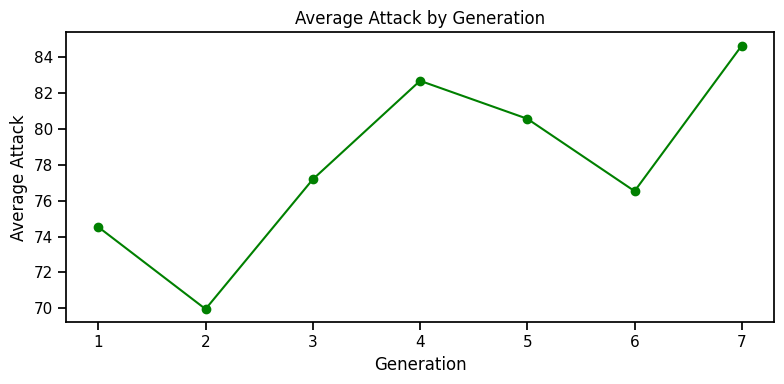

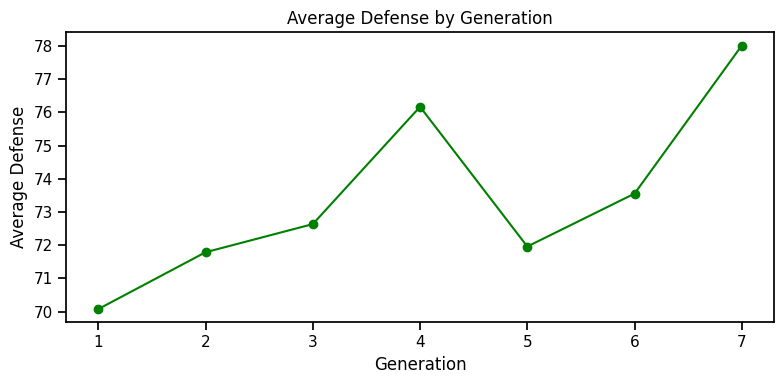

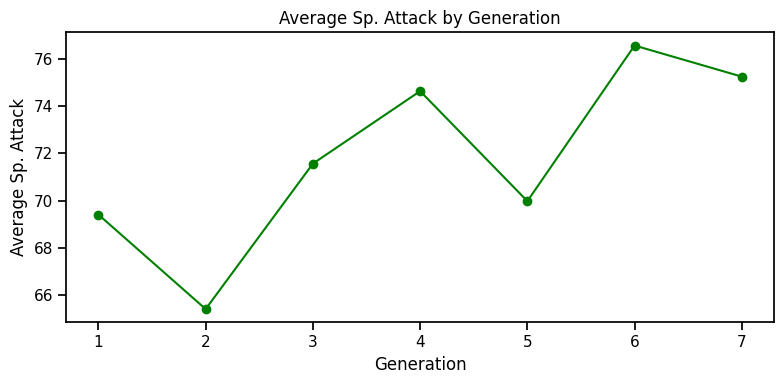

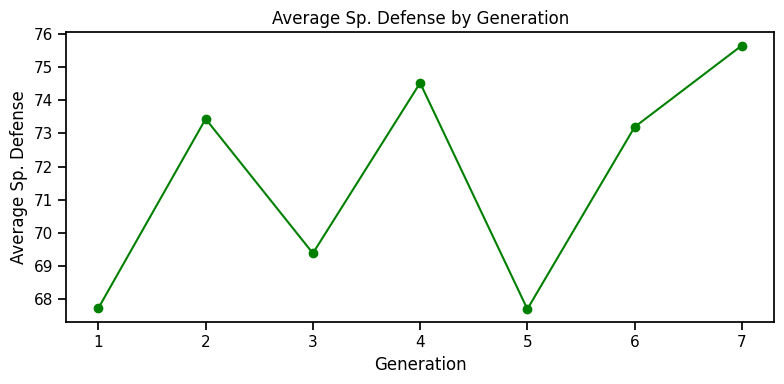

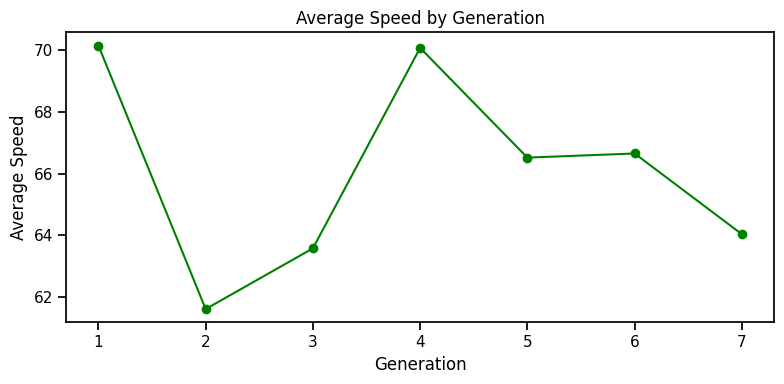

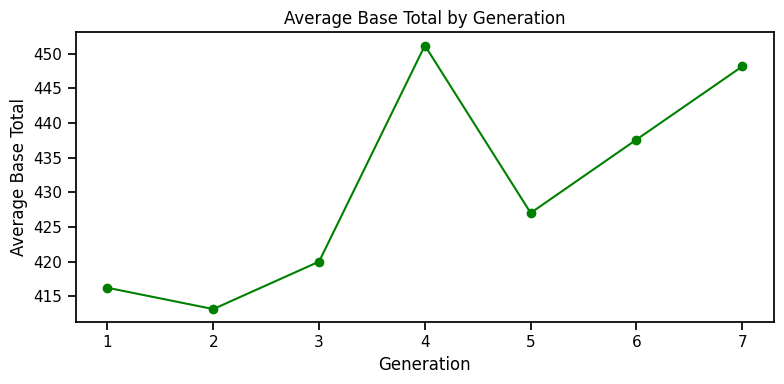

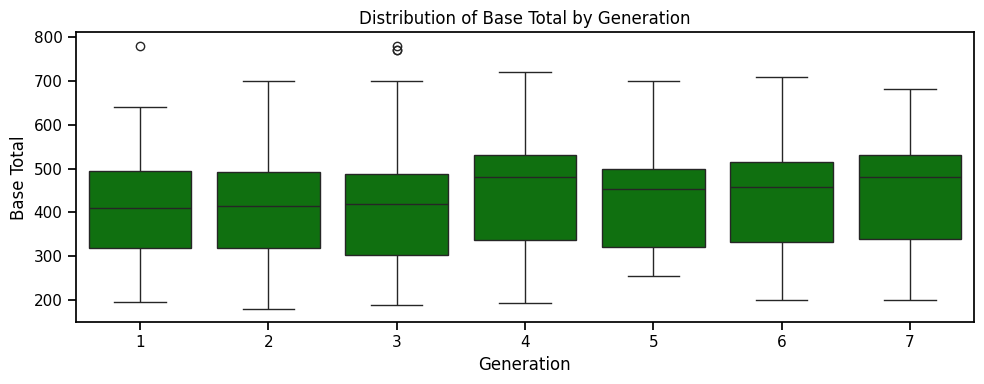

In [10]:
gen_means = df.groupby("generation")[stats_cols + ["base_total"]].mean(numeric_only=True)

for col in stats_cols + ["base_total"]:
    plt.figure(figsize=(8, 4))
    plt.plot(gen_means.index, gen_means[col], marker="o", color=GREEN)
    plt.xlabel("Generation")
    plt.ylabel(f"Average {pretty_names.get(col, 'Base Total' if col=='base_total' else col)}")
    title_metric = pretty_names.get(col, "Base Total")
    plt.title(f"Average {title_metric} by Generation")
    plt.xticks(gen_means.index)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="generation", y="base_total", color=GREEN)
plt.title("Distribution of Base Total by Generation")
plt.xlabel("Generation")
plt.ylabel("Base Total")
plt.tight_layout()
plt.show()

Average values change gradually across generations, suggesting increasing diversity and specialization rather than simple power escalation.


## Legendary status (control visualization)

A simple visualization is used as a control check to observe differences in overall base totals.


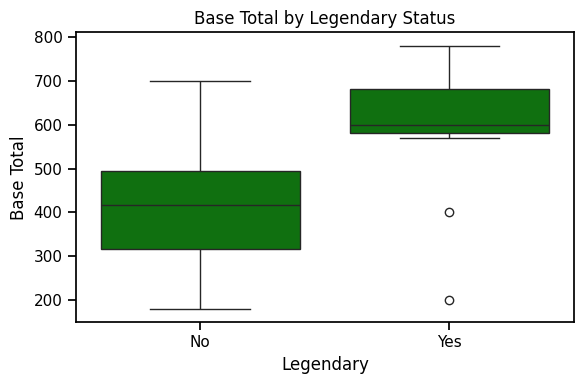

In [11]:
df_leg = df.copy()
df_leg["Legendary"] = df_leg["is_legendary"].map({0: "No", 1: "Yes"})

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_leg, x="Legendary", y="base_total", color=GREEN, order=["No", "Yes"])
plt.xlabel("Legendary")
plt.ylabel("Base Total")
plt.title("Base Total by Legendary Status")
plt.tight_layout()
plt.show()

Pokémon labeled as legendary generally occupy higher regions of the base total distribution, confirming that they represent a distinct segment of the dataset. This visualization is included as a brief control check and is not explored further.


## Conclusion

This exploratory data analysis examined the structure and statistical characteristics of a Pokémon dataset, focusing on base stats, type associations, and generational patterns.

The analysis showed that Pokémon stats are unevenly distributed, with most individuals clustered around moderate values and fewer Pokémon exhibiting extreme profiles. Scatter-based visualizations highlighted this variability while preserving individual level information.

Relationships between offensive and defensive attributes revealed clear specialization patterns, indicating that Pokémon are designed around distinct roles rather than uniform balance. Type-based analyses further demonstrated that Pokémon types influence statistical tendencies but do not determine overall strength, as no single type consistently dominates across all attributes.

Generational trends suggested gradual changes over time, reflecting increasing diversity and design complexity rather than linear power escalation.

Overall, this project illustrates how exploratory data analysis can uncover meaningful patterns and design trade-offs within a structured dataset, providing a solid foundation for more advanced analyses


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5562491b-a98e-4925-a811-76400f1e61c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>